In [4]:
import numpy as np
import pandas as pd 

In [5]:
train = pd.read_csv('KDDTrain+.txt')
test = pd.read_csv('KDDTest+.txt')

In [5]:
train.head()

,0,tcp,ftp_data,SF,491,0.1,0.2,0.3,0.4,0.5,...,0.17.1,0.03,0.17.2,0.00.6,0.00.7,0.00.8,0.05,0.00.9,normal,20
0,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.0,0.00,normal,15
1,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.0,0.00,neptune,19
2,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.0,0.01,normal,21
3,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,normal,21
4,0,tcp,private,REJ,0,0,0,0,0,0,...,0.07,0.07,0.00,0.00,0.00,0.00,1.0,1.00,neptune,21


In [6]:
test.head() 

,0,tcp,private,REJ,0.1,0.2,0.3,0.4,0.5,0.6,...,0.04.1,0.06.1,0.00.3,0.00.4,0.00.5,0.00.6,1.00.2,1.00.3,neptune,21
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
2,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
3,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
4,0,tcp,http,SF,267,14515,0,0,0,0,...,1.00,0.00,0.01,0.03,0.01,0.0,0.00,0.00,normal,21


In [6]:
print("Train shape:", train.shape) 
print("Test shape:", test.shape)

Train shape: (125972, 43)
Test shape: (22543, 43)


In [7]:
col_names = ["duration","protocol_type","service","flag","src_bytes",
    "dst_bytes","land","wrong_fragment","urgent","hot","num_failed_logins",
    "logged_in","num_compromised","root_shell","su_attempted","num_root",
    "num_file_creations","num_shells","num_access_files","num_outbound_cmds",
    "is_host_login","is_guest_login","count","srv_count","serror_rate",
    "srv_serror_rate","rerror_rate","srv_rerror_rate","same_srv_rate",
    "diff_srv_rate","srv_diff_host_rate","dst_host_count","dst_host_srv_count",
    "dst_host_same_srv_rate","dst_host_diff_srv_rate","dst_host_same_src_port_rate",
    "dst_host_srv_diff_host_rate","dst_host_serror_rate","dst_host_srv_serror_rate",
    "dst_host_rerror_rate","dst_host_srv_rerror_rate","label", "difficulty"]

In [8]:
train = pd.read_csv("KDDTrain+.txt", header=None, names=col_names)
test = pd.read_csv("KDDTest+.txt", header=None, names=col_names) 

In [10]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [11]:
test.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label,difficulty
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.0,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.0,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.0,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.0,0.0,0.83,0.71,mscan,11


In [9]:
print('Label distribution for train:')
print(train['label'].value_counts())
print("Label distribution for test:")
print(test['label'].value_counts())

Label distribution for train:
normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64
Label distribution for test:
normal             9711
neptune            4657
guess_passwd       1231
mscan               996
warezmaster         944
apache2             737
satan               735
processtable        685
smurf               665
back                359
snmpguess           331
saint               319
mailbomb            293
snmpgetattack       178
port

In [10]:
print("Train dataset:")
for col_name in train.columns: 
  if train[col_name].dtypes == 'object': 
    unique_cat = len(train[col_name].unique())
    print(f"Feature, {col_name}, has {unique_cat} categories.")

Train dataset:
Feature, protocol_type, has 3 categories.
Feature, service, has 70 categories.
Feature, flag, has 11 categories.
Feature, label, has 23 categories.


In [11]:
print("Test dataset:")
for col_name in test.columns: 
  if test[col_name].dtypes == 'object': 
    unique_cat = len(test[col_name].unique())
    print(f"Feature, {col_name}, has {unique_cat} categories.")

Test dataset:
Feature, protocol_type, has 3 categories.
Feature, service, has 64 categories.
Feature, flag, has 11 categories.
Feature, label, has 38 categories.


In [12]:
cat_cols = ['protocol_type', 'service', 'flag']
train_cat_vals = train[cat_cols]
test_cat_vals = test[cat_cols]

In [13]:
train_cat_vals.head()

,protocol_type,service,flag
0,tcp,ftp_data,SF
1,udp,other,SF
2,tcp,private,S0
3,tcp,http,SF
4,tcp,http,SF


In [14]:
test_cat_vals.head()

,protocol_type,service,flag
0,tcp,private,REJ
1,tcp,private,REJ
2,tcp,ftp_data,SF
3,icmp,eco_i,SF
4,tcp,telnet,RSTO


In [15]:
protocol = sorted(train.protocol_type.unique())
string1 = 'Protocol_type_'
protocol2 = [string1 + x for x in protocol]

In [16]:
service = sorted(train.service.unique())
string2 = 'service_'
service2 = [string2 + x for x in service]

In [17]:
flag = sorted(train.flag.unique())
string3 = 'flag_'
flag2 = [string3 + x for x in flag]

In [18]:
dumcols = protocol2 + service2 + flag2
print(dumcols) 

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_aol', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_harvest', 'service_hostnames', 'service_http', 'service_http_2784', 'service_http_443', 'service_http_8001', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_red_i', 'service_remote_job', 'serv

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
train_cat_vals = train_cat_vals.apply(LabelEncoder().fit_transform)
train_cat_vals.head(10)

,protocol_type,service,flag
0,1,20,9
1,2,44,9
2,1,49,5
3,1,24,9
4,1,24,9
5,1,49,1
6,1,49,5
7,1,49,5
8,1,51,5
9,1,49,5


In [21]:
protocol = sorted(test.protocol_type.unique())
string1 = 'Protocol_type_'
protocol2 = [string1 + x for x in protocol]

In [22]:
service = sorted(test.service.unique())
string2 = 'service_'
service2 = [string2 + x for x in service]

In [23]:
flag = sorted(test.flag.unique())
string3 = 'flag_'
flag2 = [string3 + x for x in flag]

In [24]:
dumcols2 = protocol2 + service2 + flag2
print(dumcols2) 

['Protocol_type_icmp', 'Protocol_type_tcp', 'Protocol_type_udp', 'service_IRC', 'service_X11', 'service_Z39_50', 'service_auth', 'service_bgp', 'service_courier', 'service_csnet_ns', 'service_ctf', 'service_daytime', 'service_discard', 'service_domain', 'service_domain_u', 'service_echo', 'service_eco_i', 'service_ecr_i', 'service_efs', 'service_exec', 'service_finger', 'service_ftp', 'service_ftp_data', 'service_gopher', 'service_hostnames', 'service_http', 'service_http_443', 'service_imap4', 'service_iso_tsap', 'service_klogin', 'service_kshell', 'service_ldap', 'service_link', 'service_login', 'service_mtp', 'service_name', 'service_netbios_dgm', 'service_netbios_ns', 'service_netbios_ssn', 'service_netstat', 'service_nnsp', 'service_nntp', 'service_ntp_u', 'service_other', 'service_pm_dump', 'service_pop_2', 'service_pop_3', 'service_printer', 'service_private', 'service_remote_job', 'service_rje', 'service_shell', 'service_smtp', 'service_sql_net', 'service_ssh', 'service_sunrpc'

In [25]:
test_cat_vals = test_cat_vals.apply(LabelEncoder().fit_transform)
test_cat_vals.head(10)

,protocol_type,service,flag
0,1,45,1
1,1,45,1
2,1,19,9
3,0,13,9
4,1,55,2
5,1,22,9
6,1,49,9
7,1,55,9
8,1,22,9
9,1,18,9


In [26]:
from sklearn.preprocessing import OneHotEncoder

In [27]:
encoder = OneHotEncoder() 
train_cat_vals_enc = encoder.fit_transform(train_cat_vals)
train_cat_data = pd.DataFrame(train_cat_vals_enc.toarray(), columns=dumcols)

In [28]:
test_cat_vals_enc = encoder.fit_transform(test_cat_vals) 
test_cat_data = pd.DataFrame(test_cat_vals_enc.toarray(), columns=dumcols2)

In [29]:
train_cat_data.head()

,Protocol_type_icmp,Protocol_type_tcp,Protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [30]:
trainservice = train['service'].tolist() 
testservice = test['service'].tolist() 
difference = list(set(trainservice) - set(testservice))
string = 'service_'
difference = [string + x for x in difference]
difference

['service_harvest',
 'service_http_8001',
 'service_red_i',
 'service_aol',
 'service_http_2784',
 'service_urh_i']

In [31]:
for col in difference: 
  test_cat_data[col] = 0 

test_cat_data.shape

(22544, 84)

In [32]:
train_cat_data.shape

(125973, 84)

In [33]:
newTrain = train.join(train_cat_data) 
newTrain.drop(['flag', 'protocol_type', 'service'], axis=1, inplace=True)
newTrain.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_REJ,flag_RSTO,flag_RSTOS0,flag_RSTR,flag_S0,flag_S1,flag_S2,flag_S3,flag_SF,flag_SH
0,0,491,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0,146,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0,232,8153,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0,199,420,0,0,0,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
newTest = test.join(test_cat_data) 
newTest.drop(['flag', 'protocol_type', 'service'], axis=1, inplace=True) 
newTest.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,flag_S2,flag_S3,flag_SF,flag_SH,service_harvest,service_http_8001,service_red_i,service_aol,service_http_2784,service_urh_i
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0
2,2,12983,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
3,0,20,0,0,0,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0,0,0,0,0,0
4,1,0,15,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0,0,0,0,0,0


In [35]:
print(newTrain.shape) 
print(newTest.shape) 

(125973, 124)
(22544, 124)


In [36]:
newTrain['label'].value_counts()

normal             67343
neptune            41214
satan               3633
ipsweep             3599
portsweep           2931
smurf               2646
nmap                1493
back                 956
teardrop             892
warezclient          890
pod                  201
guess_passwd          53
buffer_overflow       30
warezmaster           20
land                  18
imap                  11
rootkit               10
loadmodule             9
ftp_write              8
multihop               7
phf                    4
perl                   3
spy                    2
Name: label, dtype: int64

In [37]:
dfLabel = newTrain['label']
dfLabel.head()

0     normal
1     normal
2    neptune
3     normal
4     normal
Name: label, dtype: object

In [38]:
labelList = []
for x in dfLabel: 
  if x == 'normal': 
    labelList.append(0)
  else: 
    labelList.append(1)
labeList = pd.DataFrame(labelList) 

In [39]:
newTrain['label'] = labeList

In [40]:
newTrain['label'].value_counts()

0    67343
1    58630
Name: label, dtype: int64

In [41]:
dfLabel = newTest['label']
labelList = []
for x in dfLabel: 
  if x == 'normal': 
    labelList.append(0)
  else: 
    labelList.append(1) 
labelList = pd.DataFrame(labelList) 

newTest['label'] = labelList 
newTest['label'].value_counts() 

1    12833
0     9711
Name: label, dtype: int64

In [43]:
# Split into x and y data before applying model. 
newTest['label'].head()

0    1
1    1
2    0
3    1
4    1
Name: label, dtype: int64

In [49]:
featuresTrain = newTrain.drop('label', axis=1)
print(featuresTrain.shape) 

(125973, 123)


In [50]:
yTrain = newTrain['label']
print(yTrain.shape) 

(125973,)


In [51]:
featuresTest = newTest.drop('label', axis=1)
yTest = newTest['label']
print(featuresTest.shape) 
print(yTest.shape) 

(22544, 123)
(22544,)


In [52]:
from sklearn.tree import DecisionTreeClassifier 

In [54]:
tree = DecisionTreeClassifier(random_state=42) 
tree.fit(featuresTrain, yTrain) 
predictions = tree.predict(featuresTest) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [57]:
pd.crosstab(yTest, predictions, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9392,319
1,3450,9383


In [60]:
from sklearn import metrics 
print("Base Accuracy:", metrics.accuracy_score(yTest, predictions))

Base Accuracy: 0.8328158268275373


In [61]:
from sklearn.ensemble import RandomForestClassifier 

forest = RandomForestClassifier(n_estimators=200) 
forest.fit(featuresTrain, yTrain) 
preds = forest.predict(featuresTest) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [62]:
pd.crosstab(yTest, preds, rownames=['Actual attacks'], colnames=['Predicted attacks'])

Predicted attacks,0,1
Actual attacks,,
0,9438,273
1,4857,7976


In [63]:
print("Base Accuracy:", metrics.accuracy_score(yTest, preds))

Base Accuracy: 0.772444996451384


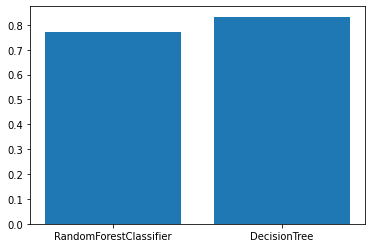

In [65]:
import matplotlib.pyplot as plt 

xlabels = ['RandomForestClassifier', 'DecisionTree']
ylabels = [metrics.accuracy_score(yTest, preds), 
           metrics.accuracy_score(yTest, predictions)]

plt.bar(xlabels, ylabels) 
plt.show()